# Final Project (Continuation of Mid-Term Project)

Rishabh Kaushick <br> 
NU ID: 002808996, <br>
kaushick.r@northeastern.edu <br>
<br>
College of Engineering, <br>
Northeastern University <br>
Toronto, ON

In [1]:
# importing the required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
# loading the data
# structured data
scm_dataset_path = 'data/DataCoSupplyChainDataset.csv'
scm_df = pd.read_csv(scm_dataset_path, encoding='latin-1')

# unstructured data
scm_unstructured_path = 'data/tokenized_access_logs.csv'
scm_unstructured_df = pd.read_csv(scm_unstructured_path)

In [3]:
# Let's see what the first five rows data looks like
scm_df.head()

Type  Days for shipping (real)  Days for shipment (scheduled)  \
0     DEBIT                         3                              4   
1  TRANSFER                         5                              4   
2      CASH                         4                              4   
3     DEBIT                         3                              4   
4   PAYMENT                         2                              4   

   Benefit per order  Sales per customer   Delivery Status  \
0          91.250000          314.640015  Advance shipping   
1        -249.089996          311.359985     Late delivery   
2        -247.779999          309.720001  Shipping on time   
3          22.860001          304.809998  Advance shipping   
4         134.210007          298.250000  Advance shipping   

   Late_delivery_risk  Category Id   Category Name Customer City  ...  \
0                   0           73  Sporting Goods        Caguas  ...   
1                   1           73  Sporting Goods        Caguas  ...   
2                   0           73  Sporting Goods      San Jose  ...   
3                   0           73  Sporting Goods   Los Angeles  ...   
4                   0           73  Sporting Goods        Caguas  ...   

  Order Zipcode Product Card Id Product Category Id  Product Description  \
0           NaN            1360                  73                  NaN   
1           NaN            1360                  73                  NaN   
2           NaN            1360                  73                  NaN   
3           NaN            1360                  73                  NaN   
4           NaN            1360                  73                  NaN   

                                  Product Image  Product Name Product Price  \
0  http://images.acmesports.sports/Smart+watch   Smart watch         327.75   
1  http://images.acmesports.sports/Smart+watch   Smart watch         327.75   
2  http://images.acmesports.sports/Smart+watch   Smart watch         327.75   
3  http://images.acmesports.sports/Smart+watch   Smart watch         327.75   
4  http://images.acmesports.sports/Smart+watch   Smart watch         327.75   

  Product Status shipping date (DateOrders)   Shipping Mode  
0              0             2/3/2018 22:56  Standard Class  
1              0            1/18/2018 12:27  Standard Class  
2              0            1/17/2018 12:06  Standard Class  
3              0            1/16/2018 11:45  Standard Class  
4              0            1/15/2018 11:24  Standard Class  

[5 rows x 53 columns]

In [4]:
# total number of rows in the above csv:
scm_df.count()

Type                             180519
Days for shipping (real)         180519
Days for shipment (scheduled)    180519
Benefit per order                180519
Sales per customer               180519
Delivery Status                  180519
Late_delivery_risk               180519
Category Id                      180519
Category Name                    180519
Customer City                    180519
Customer Country                 180519
Customer Email                   180519
Customer Fname                   180519
Customer Id                      180519
Customer Lname                   180511
Customer Password                180519
Customer Segment                 180519
Customer State                   180519
Customer Street                  180519
Customer Zipcode                 180516
Department Id                    180519
Department Name                  180519
Latitude                         180519
Longitude                        180519
Market                           180519


In [5]:
scm_unstructured_df.head()

Product             Category  \
0     adidas Brazuca 2017 Official Match Ball  baseball & softball   
1       The North Face Women's Recon Backpack   hunting & shooting   
2      adidas Kids' RG III Mid Football Cleat       featured shops   
3  Under Armour Men's Compression EV SL Slide          electronics   
4                 Pelican Sunstream 100 Kayak         water sports   

            Date Month  Hour Department              ip  \
0  9/1/2017 6:00   Sep     6   fitness     37.97.182.65   
1  9/1/2017 6:00   Sep     6  fan shop     206.56.112.1   
2  9/1/2017 6:00   Sep     6   apparel    215.143.180.0   
3  9/1/2017 6:00   Sep     6  footwear     206.56.112.1   
4  9/1/2017 6:01   Sep     6  fan shop   136.108.56.242   

                                                 url  
0  /department/fitness/category/baseball%20&%20so...  
1  /department/fan%20shop/category/hunting%20&%20...  
2  /department/apparel/category/featured%20shops/...  
3  /department/footwear/category/electronics/prod...  
4  /department/fan%20shop/category/water%20sports...

In [6]:
scm_unstructured_df.count()

Product       469977
Category      469977
Date          469977
Month         469977
Hour          469977
Department    469977
ip            469977
url           469977
dtype: int64

In the main csv dataset, there are 53 columns and 180,519 rows. Therefore there are 53 X 180,519 = 9,567,507 data points.
<br><br>
However, from the unstructured dataset, we can see that there are 8 columns and 469,977 rows. Therefore there are 8 X 469,977 = 3,759,816 data points <br> <br>
Since the columns in each of the datasets are different from each other, and since there is a lot more data in the structured dataframe, we will use the same and disregard the unstructured data for the scope of this project.

In [7]:
# understanding the number of distinct non null numbers are present in each column
scm_df.nunique()

Type                                  4
Days for shipping (real)              7
Days for shipment (scheduled)         4
Benefit per order                 21998
Sales per customer                 2927
Delivery Status                       4
Late_delivery_risk                    2
Category Id                          51
Category Name                        50
Customer City                       563
Customer Country                      2
Customer Email                        1
Customer Fname                      782
Customer Id                       20652
Customer Lname                     1109
Customer Password                     1
Customer Segment                      3
Customer State                       46
Customer Street                    7458
Customer Zipcode                    995
Department Id                        11
Department Name                      11
Latitude                          11250
Longitude                          4487
Market                                5


In [8]:
# checking which columns have null rows
scm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 180519 non-null  object 
 12  Customer Fname                

From the above -  we can see that there are null values in the following columns
- Order Zipcode
- Project Description


In [9]:
scm_df.describe()

Days for shipping (real)  Days for shipment (scheduled)  \
count             180519.000000                  180519.000000   
mean                   3.497654                       2.931847   
std                    1.623722                       1.374449   
min                    0.000000                       0.000000   
25%                    2.000000                       2.000000   
50%                    3.000000                       4.000000   
75%                    5.000000                       4.000000   
max                    6.000000                       4.000000   

       Benefit per order  Sales per customer  Late_delivery_risk  \
count      180519.000000       180519.000000       180519.000000   
mean           21.974989          183.107609            0.548291   
std           104.433526          120.043670            0.497664   
min         -4274.979980            7.490000            0.000000   
25%             7.000000          104.379997            0.000000   
50%            31.520000          163.990005            1.000000   
75%            64.800003          247.399994            1.000000   
max           911.799988         1939.989990            1.000000   

         Category Id    Customer Id  Customer Zipcode  Department Id  \
count  180519.000000  180519.000000     180516.000000  180519.000000   
mean       31.851451    6691.379495      35921.126914       5.443460   
std        15.640064    4162.918106      37542.461122       1.629246   
min         2.000000       1.000000        603.000000       2.000000   
25%        18.000000    3258.500000        725.000000       4.000000   
50%        29.000000    6457.000000      19380.000000       5.000000   
75%        45.000000    9779.000000      78207.000000       7.000000   
max        76.000000   20757.000000      99205.000000      12.000000   

            Latitude  ...  Order Item Quantity          Sales  \
count  180519.000000  ...        180519.000000  180519.000000   
mean       29.719955  ...             2.127638     203.772096   
std         9.813646  ...             1.453451     132.273077   
min       -33.937553  ...             1.000000       9.990000   
25%        18.265432  ...             1.000000     119.980003   
50%        33.144863  ...             1.000000     199.919998   
75%        39.279617  ...             3.000000     299.950012   
max        48.781933  ...             5.000000    1999.989990   

       Order Item Total  Order Profit Per Order  Order Zipcode  \
count     180519.000000           180519.000000   24840.000000   
mean         183.107609               21.974989   55426.132327   
std          120.043670              104.433526   31919.279101   
min            7.490000            -4274.979980    1040.000000   
25%          104.379997                7.000000   23464.000000   
50%          163.990005               31.520000   59405.000000   
75%          247.399994               64.800003   90008.000000   
max         1939.989990              911.799988   99301.000000   

       Product Card Id  Product Category Id  Product Description  \
count    180519.000000        180519.000000                  0.0   
mean        692.509764            31.851451                  NaN   
std         336.446807            15.640064                  NaN   
min          19.000000             2.000000                  NaN   
25%         403.000000            18.000000                  NaN   
50%         627.000000            29.000000                  NaN   
75%        1004.000000            45.000000                  NaN   
max        1363.000000            76.000000                  NaN   

       Product Price  Product Status  
count  180519.000000        180519.0  
mean      141.232550             0.0  
std       139.732492             0.0  
min         9.990000             0.0  
25%        50.000000             0.0  
50%        59.990002             0.0  
75%       199.990005             0.0  
max      1999.989990             0.0  

[8 r

In [10]:
# Let's see what kind of data is present in the 'Type' Column
scm_df['Type'].value_counts()

Type
DEBIT       69295
TRANSFER    49883
PAYMENT     41725
CASH        19616
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x14f3cde50>,
 [Text(0.428168266257398, 1.1210137982068438, 'DEBIT'),
  Text(-1.1885215498911712, -0.16557936297826523, 'TRANSFER'),
  Text(0.19342361628901053, -1.1843087877161436, 'PAYMENT'),
  Text(1.130752535999951, -0.40174457349126647, 'CASH')])

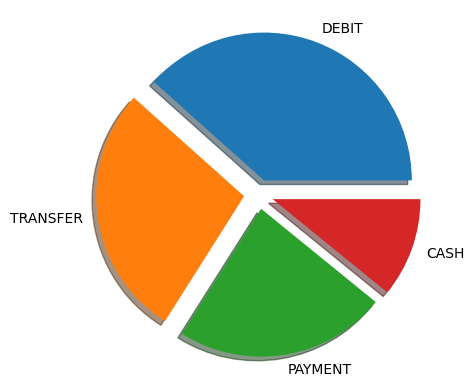

In [11]:
# visualizing the same thing in a pie chart

# Trying to create a plot with each section exploded from the pie.
my_explode = [0.1, 0.1, 0.1, 0.1]
my_labels = np.array(['DEBIT', 'TRANSFER', 'PAYMENT', 'CASH'])
type_value_array = (scm_df['Type'].value_counts())
plt.pie(type_value_array, labels=my_labels, shadow=True, explode=my_explode)

In [12]:
# Delivery Status
scm_df['Delivery Status'].value_counts()

Delivery Status
Late delivery        98977
Advance shipping     41592
Shipping on time     32196
Shipping canceled     7754
Name: count, dtype: int64

Text(0.5, 1.0, 'Frequency Distribution of Delivery Status')

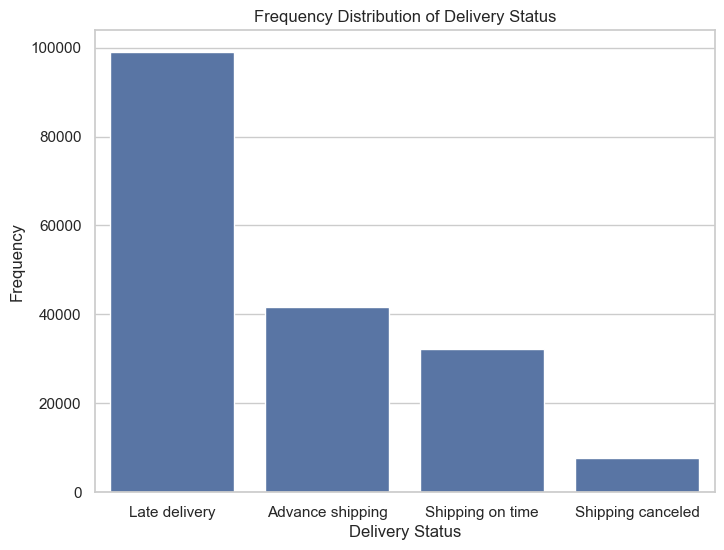

In [13]:
# plotting it in a graph to visualize it better
sns.set(style="whitegrid")
plt.figure(figsize = (8,6))
sns.barplot(scm_df['Delivery Status'].value_counts())
plt.xlabel("Delivery Status")
plt.ylabel("Frequency")
plt.title("Frequency Distribution of Delivery Status")

We can see that the Delivery Status for most of the deliveries in the dataset are 'Late delivery'

<Axes: xlabel='Late Delivery Risk', ylabel='Frequency'>

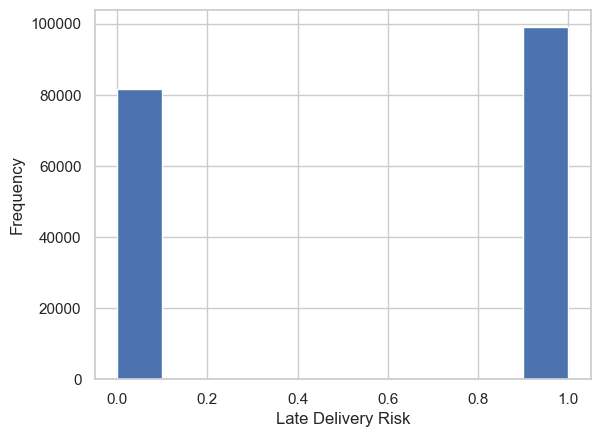

In [14]:
# late delivery risk column
# scm_df['Late_delivery_risk'].value_counts()
scm_df['Late_delivery_risk'].plot.hist(xlabel='Late Delivery Risk')

<Axes: xlabel='Delivery Status', ylabel='count'>

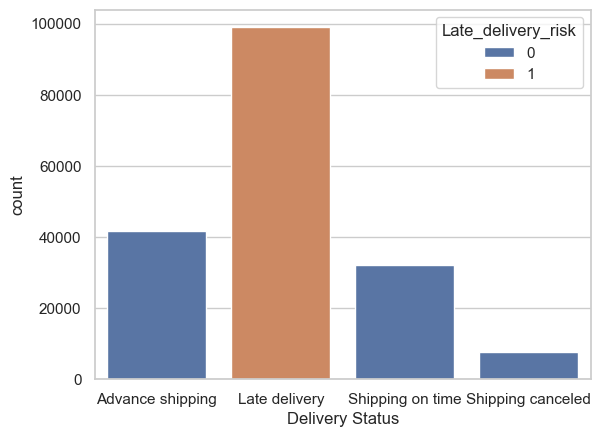

In [15]:
# late delivery risk and delivery status
sns.countplot(scm_df, x='Delivery Status', hue='Late_delivery_risk')

The above graph is counter-intuitive. Only on Late deliveries - we have 'Late delivery risk' as 1, and on all other Delivery statuses, the late delivery risk is 0.


Therefore, while training the model we can remove the Delivery Status column - since it is a redundant version of the 'Late delivery risk' column.

In [16]:
# checking which columns have null rows
scm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 180519 non-null  object 
 12  Customer Fname                

Let us try to find out more about location data of the customers which result in late delivery.

<Axes: xlabel='Order Region', ylabel='count'>

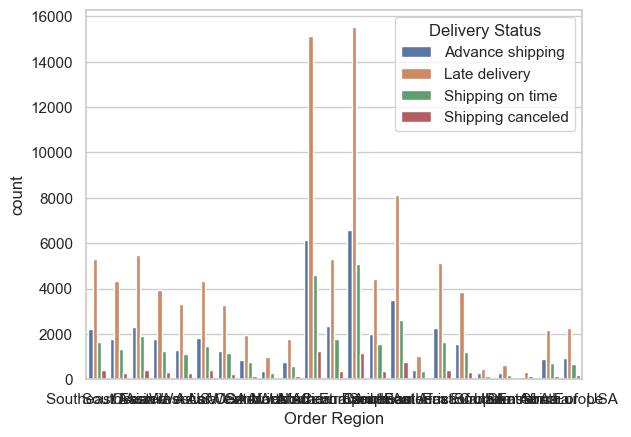

In [17]:
# Plotting geographic data of the customer locations which resulted in Late Delivery
sns.countplot(scm_df, x='Order Region', hue='Delivery Status')


The above plot is not useful since we are unable to see the regions on the x-axis

However, we can plot the same data but instead of order region in the x axis & different colors for delivery status, let us consider delivery status on the x-axis and regions with different colors

<Axes: xlabel='Delivery Status', ylabel='count'>

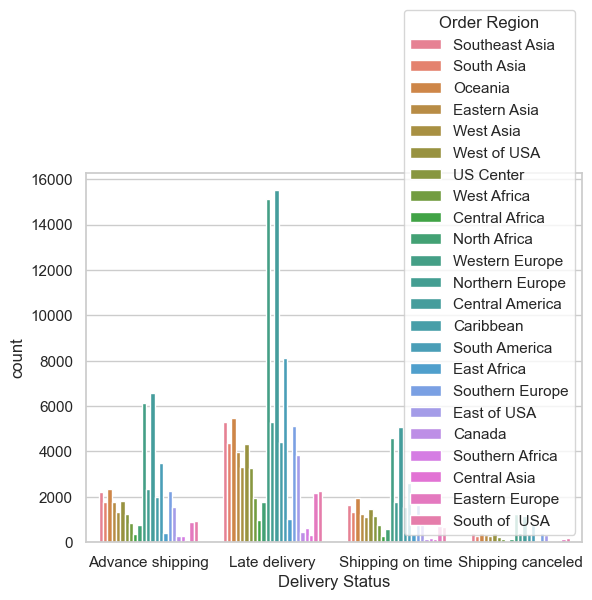

In [18]:
# trying to plot the same figure in a different way
sns.countplot(scm_df, x='Delivery Status', hue='Order Region')

This is better, but it is still hard to read the graph to understand exactly which region has most delivery statuses as 'Late delievry'

Therefore, using the plotly library as shown below in order to have an interactive graph to plot the same data.

In [19]:
# displaying the same data using plotly library
data_delivery_status_region=scm_df.groupby(['Delivery Status', 'Order Region'])['Order Id'].count().reset_index(name='Number of Orders').sort_values(by= 'Number of Orders', ascending= False)
px.bar(data_delivery_status_region, x='Delivery Status', y='Number of Orders'  , color='Order Region',
       )

In [20]:
# late delivery risk vs order region
data_delivery_status_region=scm_df.groupby(['Late_delivery_risk', 'Order Region'])['Order Id'].count().reset_index(name='Number of Orders').sort_values(by= 'Number of Orders', ascending= False)
px.bar(data_delivery_status_region, x='Late_delivery_risk', y='Number of Orders'  , color='Order Region',
       )

In [21]:
# Customer Segment
scm_df['Customer Segment'].value_counts()

Customer Segment
Consumer       93504
Corporate      54789
Home Office    32226
Name: count, dtype: int64

In [22]:
# Market
scm_df['Market'].value_counts()

Market
LATAM           51594
Europe          50252
Pacific Asia    41260
USCA            25799
Africa          11614
Name: count, dtype: int64

<Axes: xlabel='Market', ylabel='percent'>

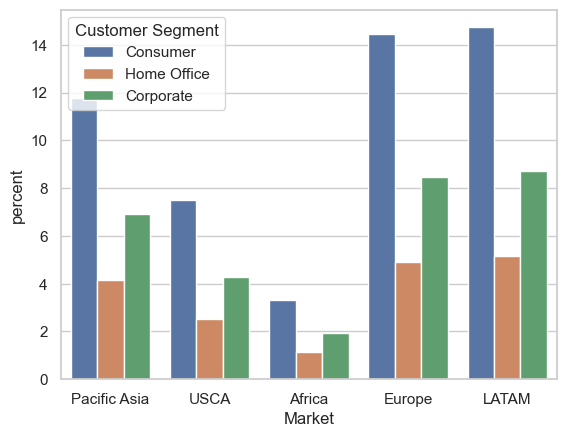

In [23]:
# In each market - finding the customer segment (Consumer, Home Office and Corporate frequencies)
sns.countplot(scm_df, x="Market", hue="Customer Segment", stat="percent", legend="auto")

In [24]:
# Order Status
scm_df['Order Status'].value_counts()

Order Status
COMPLETE           59491
PENDING_PAYMENT    39832
PROCESSING         21902
PENDING            20227
CLOSED             19616
ON_HOLD             9804
SUSPECTED_FRAUD     4062
CANCELED            3692
PAYMENT_REVIEW      1893
Name: count, dtype: int64

<Axes: title={'center': 'ORDER STATUS'}>

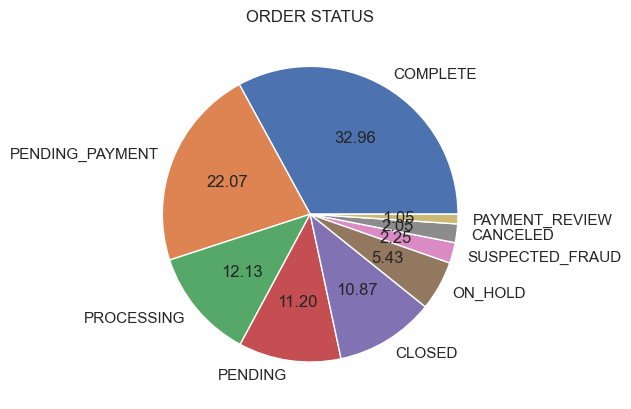

In [25]:
# again visualizing the order status with pie charts
scm_df['Order Status'].value_counts().plot.pie(title='ORDER STATUS',autopct="%.2f",ylabel="")

In [26]:
# Product Status
scm_df['Product Status'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 180519 entries, 0 to 180518
Series name: Product Status
Non-Null Count   Dtype
--------------   -----
180519 non-null  int64
dtypes: int64(1)
memory usage: 1.4 MB


In [27]:
scm_df['Product Status'].value_counts()

Product Status
0    180519
Name: count, dtype: int64

Product Status can be 1 - not available and 0 available.
In this dataset, we can see that all the values are 0 (available).

Therefore this data is not useful to us, and we can drop this column.

In [28]:
# Shipping Mode
scm_df['Shipping Mode'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 180519 entries, 0 to 180518
Series name: Shipping Mode
Non-Null Count   Dtype 
--------------   ----- 
180519 non-null  object
dtypes: object(1)
memory usage: 1.4+ MB


In [29]:
scm_df['Shipping Mode'].describe()

count             180519
unique                 4
top       Standard Class
freq              107752
Name: Shipping Mode, dtype: object

In [30]:
scm_df['Shipping Mode'].value_counts()

Shipping Mode
Standard Class    107752
Second Class       35216
First Class        27814
Same Day            9737
Name: count, dtype: int64

array([[<Axes: title={'center': 'Days for shipping (real)'}>,
        <Axes: title={'center': 'Days for shipment (scheduled)'}>,
        <Axes: title={'center': 'Benefit per order'}>,
        <Axes: title={'center': 'Sales per customer'}>],
       [<Axes: title={'center': 'Late_delivery_risk'}>,
        <Axes: title={'center': 'Customer Zipcode'}>,
        <Axes: title={'center': 'Latitude'}>,
        <Axes: title={'center': 'Longitude'}>],
       [<Axes: title={'center': 'Order Item Discount'}>,
        <Axes: title={'center': 'Order Item Discount Rate'}>,
        <Axes: title={'center': 'Order Item Product Price'}>,
        <Axes: title={'center': 'Order Item Profit Ratio'}>],
       [<Axes: title={'center': 'Order Item Quantity'}>,
        <Axes: title={'center': 'Sales'}>,
        <Axes: title={'center': 'Order Item Total'}>,
        <Axes: title={'center': 'Order Profit Per Order'}>],
       [<Axes: title={'center': 'Order Zipcode'}>,
        <Axes: title={'center': 'Product Price

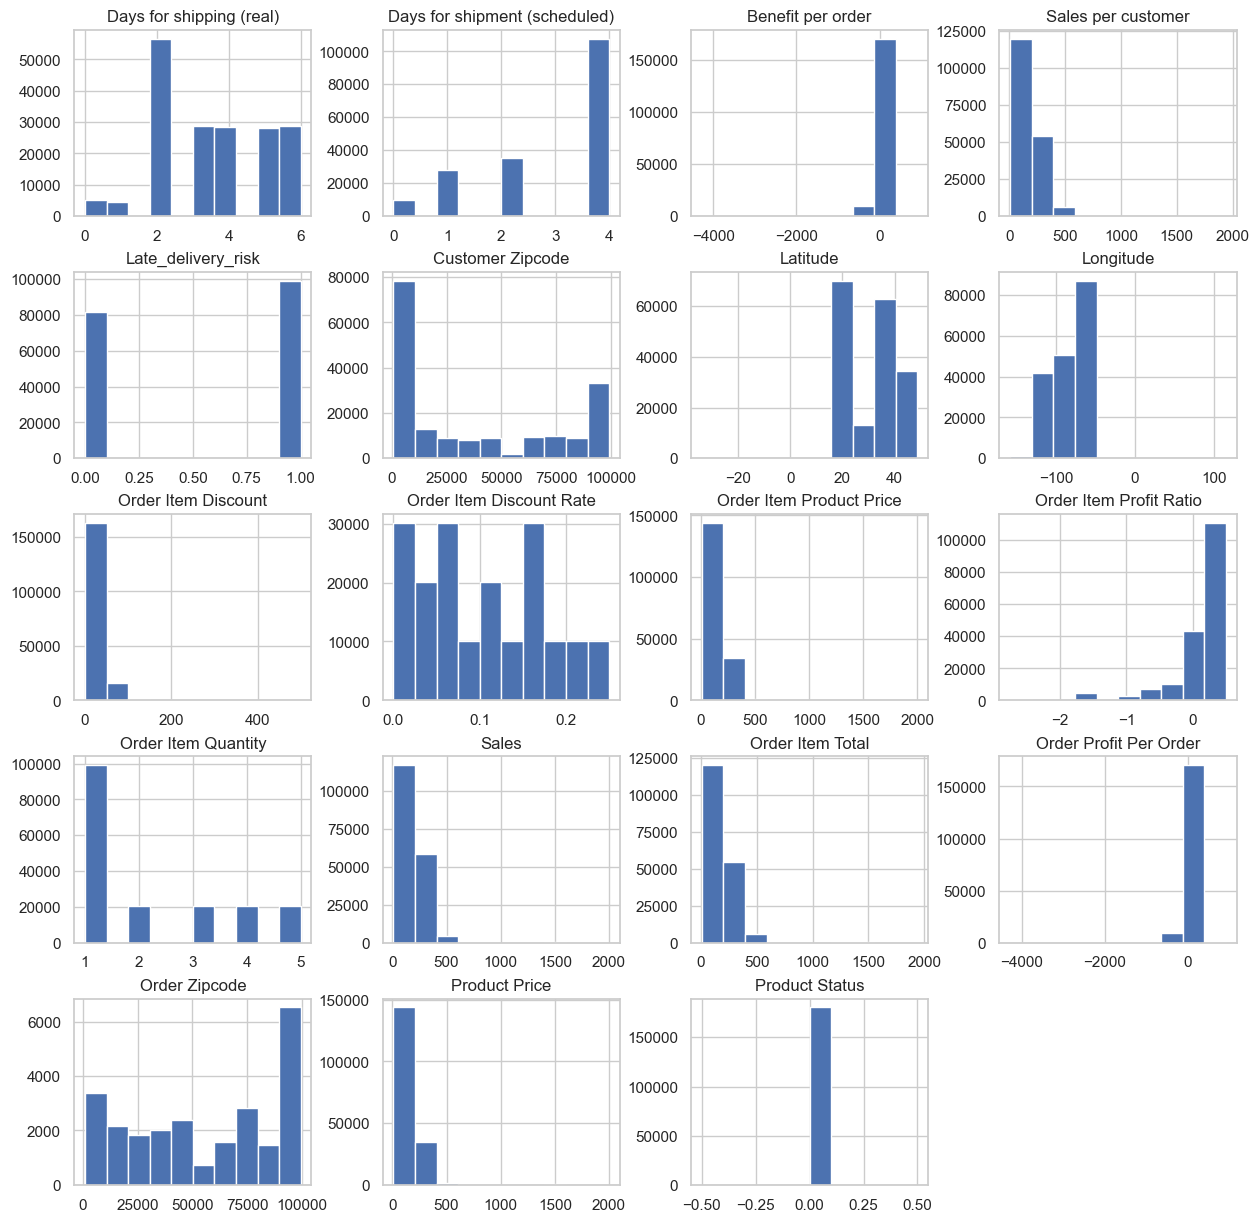

In [31]:
# plotting a histogram of all the columns

# creating a temporary dataframe for visualizing only those columns which have significance
scm_df_temp_visualization = scm_df.drop(columns=['Category Id', 
                                                 'Customer Id', 
                                                 'Department Id', 
                                                 'Order Customer Id',
                                                 'Order Id',
                                                 'Order Item Cardprod Id',
                                                 'Order Item Id',
                                                 'Product Card Id',
                                                 'Product Category Id',
                                                 'Product Description'])
scm_df_temp_visualization.hist(figsize=(15,15))

In [32]:
print(*scm_df['Category Name'].unique(), sep='\n')

Sporting Goods
Cleats
Shop By Sport
Women's Apparel
Electronics
Boxing & MMA
Cardio Equipment
Trade-In
Kids' Golf Clubs
Hunting & Shooting
Baseball & Softball
Men's Footwear
Camping & Hiking
Consumer Electronics
Cameras 
Computers
Basketball
Soccer
Girls' Apparel
Accessories
Women's Clothing
Crafts
Men's Clothing
Tennis & Racquet
Fitness Accessories
As Seen on  TV!
Golf Balls
Strength Training
Children's Clothing
Lacrosse
Baby 
Fishing
Books 
DVDs
CDs 
Garden
Hockey
Pet Supplies
Health and Beauty
Music
Video Games
Golf Gloves
Golf Bags & Carts
Golf Shoes
Golf Apparel
Women's Golf Clubs
Men's Golf Clubs
Toys
Water Sports
Indoor/Outdoor Games


/var/folders/3m/tt_kbz7d2tx3f5cx3v4nd4940000gn/T/ipykernel_75733/2825161110.py:13: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.



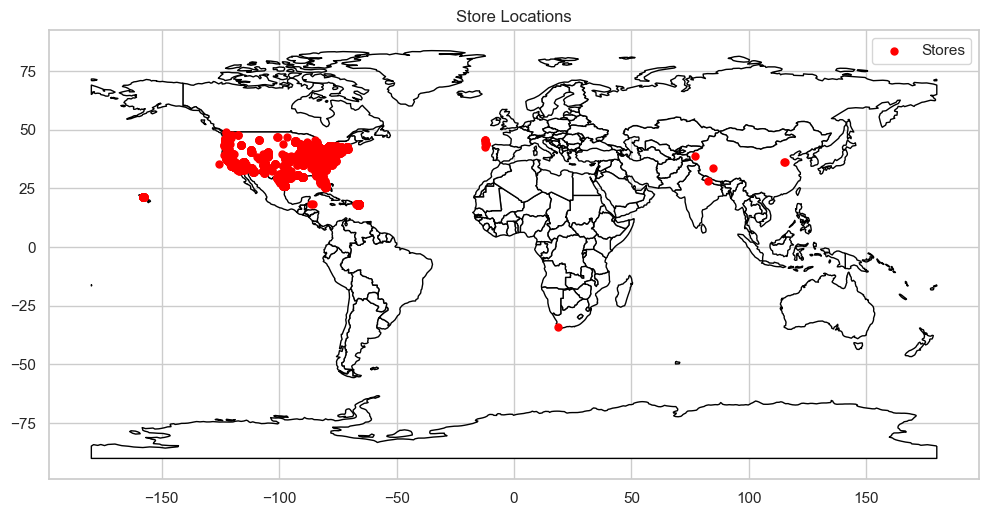

In [33]:
# using the latitude & longitude values from store to plot it on the world map
import geopandas as gpd

# dropping the duplicates and null rows
df_stores_location_lat_n_long = scm_df[['Latitude', 'Longitude']].drop_duplicates().dropna()

df_geo = gpd.GeoDataFrame(
    df_stores_location_lat_n_long,
    geometry=gpd.points_from_xy(df_stores_location_lat_n_long['Longitude'], df_stores_location_lat_n_long['Latitude'])
)

#get the map image
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

#plot the world map
ax = world.plot(figsize=(12, 8), color='white', edgecolor='black')

#plot the store locations as dots
df_geo.plot(ax=ax, marker='o', color='red', markersize=25, label='Stores')

plt.title('Store Locations')
plt.legend(loc='upper right')

## Model Preparation
Let us start with removing the following columns
1. ID Columns:
    - 'Category Id', 
    - 'Customer Id', 
    - 'Department Id', 
    - 'Order Customer Id',
    - 'Order Id',
    - 'Order Item Cardprod Id',
    - 'Order Item Id',
    - 'Product Card Id',
    - 'Product Category Id',
2. Irrelevant Non-numeric Columns
    - 'Product Description'
    - 'Customer Email'
    - 'Customer Password'
    - 'Customer Fname'
    - 'Customer Lname'
    - 'Customer State'
    - 'Customer Street'
    - 'Customer Zipcode'
    - Order Region
    - Order State
    - Order Status
    - Order Zipcode
    - Product Image
3. Redundant Columns:
    - 'Delivery Status'
    - 'Product Status'
    - 'Customer City'
    - 'Customer Country' (since we already have Order City and Order Country)

In [34]:
from sklearn import svm, metrics, tree, preprocessing, linear_model

In [35]:
scm_clean_df = scm_df.drop(columns=['Category Id', 
                                    'Customer Id', 
                                    'Department Id', 
                                    'Order Customer Id',
                                    'Order Id',
                                    'Order Item Cardprod Id',
                                    'Order Item Id',
                                    'Product Card Id',
                                    'Product Category Id',
                                    'Product Description',
                                    'Delivery Status',
                                    'Customer Email',
                                    'Customer Password',
                                    'Product Status',
                                    'Customer Fname',
                                    'Customer Lname',
                                    'Customer State',
                                    'Customer Street',
                                    'Customer Zipcode',
                                    'Customer City',
                                    'Customer Country',
                                    'Order Region',
                                    'Order State',
                                    'Order Status',
                                    'Order Zipcode',
                                    'Product Image'])

### Text Columns with Categorical Data
    - Type
    - Category Name
    - Customer Segment
    - Department Name
    - Market
    - Order City
    - Order Country
    - order date (DateOrders)
    - Product Name
    - shipping date (DateOrders)
    - Shipping Mode

In [36]:
# need to use LabelEncoders to convert the categorical text values
label_encoder = preprocessing.LabelEncoder()

In [37]:
scm_clean_df['Type'] = label_encoder.fit_transform(scm_clean_df['Type'])
scm_clean_df['Category Name'] = label_encoder.fit_transform(scm_clean_df['Category Name'])
scm_clean_df['Customer Segment'] = label_encoder.fit_transform(scm_clean_df['Customer Segment'])
scm_clean_df['Department Name'] = label_encoder.fit_transform(scm_clean_df['Department Name'])
scm_clean_df['Market'] = label_encoder.fit_transform(scm_clean_df['Market'])
scm_clean_df['Order City'] = label_encoder.fit_transform(scm_clean_df['Order City'])
scm_clean_df['Order Country'] = label_encoder.fit_transform(scm_clean_df['Order Country'])
scm_clean_df['order date (DateOrders)'] = label_encoder.fit_transform(scm_clean_df['order date (DateOrders)'])
scm_clean_df['Product Name'] = label_encoder.fit_transform(scm_clean_df['Product Name'])
scm_clean_df['shipping date (DateOrders)'] = label_encoder.fit_transform(scm_clean_df['shipping date (DateOrders)'])
scm_clean_df['Shipping Mode'] = label_encoder.fit_transform(scm_clean_df['Shipping Mode'])

In [38]:
scm_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 27 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  int64  
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Late_delivery_risk             180519 non-null  int64  
 6   Category Name                  180519 non-null  int64  
 7   Customer Segment               180519 non-null  int64  
 8   Department Name                180519 non-null  int64  
 9   Latitude                       180519 non-null  float64
 10  Longitude                      180519 non-null  float64
 11  Market                         180519 non-null  int64  
 12  Order City                    

Now all the values are in either int or float.

## Splitting Train & Test Data

In [39]:
# Next creating the train and test set

# creating a function which splits the data randomly
def split_train_test(data, test_ratio):
    np.random.seed(23) # setting the random number generator's seed will make sure that each time the same test and train set will be considered.
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [40]:
# here we are splitting the data into 80% training and 20% testing sets.
scm_trainset, scm_testset = split_train_test(scm_clean_df, 0.2)

In [41]:
len(scm_trainset)

144416

In [42]:
len(scm_testset)

36103

In [43]:
from sklearn.tree import DecisionTreeClassifier
y = scm_trainset["Late_delivery_risk"]
X = scm_trainset.drop(columns="Late_delivery_risk")

tree_clf = DecisionTreeClassifier(max_depth=5, max_features="sqrt", random_state=23, splitter="random")
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=5, max_features='sqrt', random_state=23,
                       splitter='random')

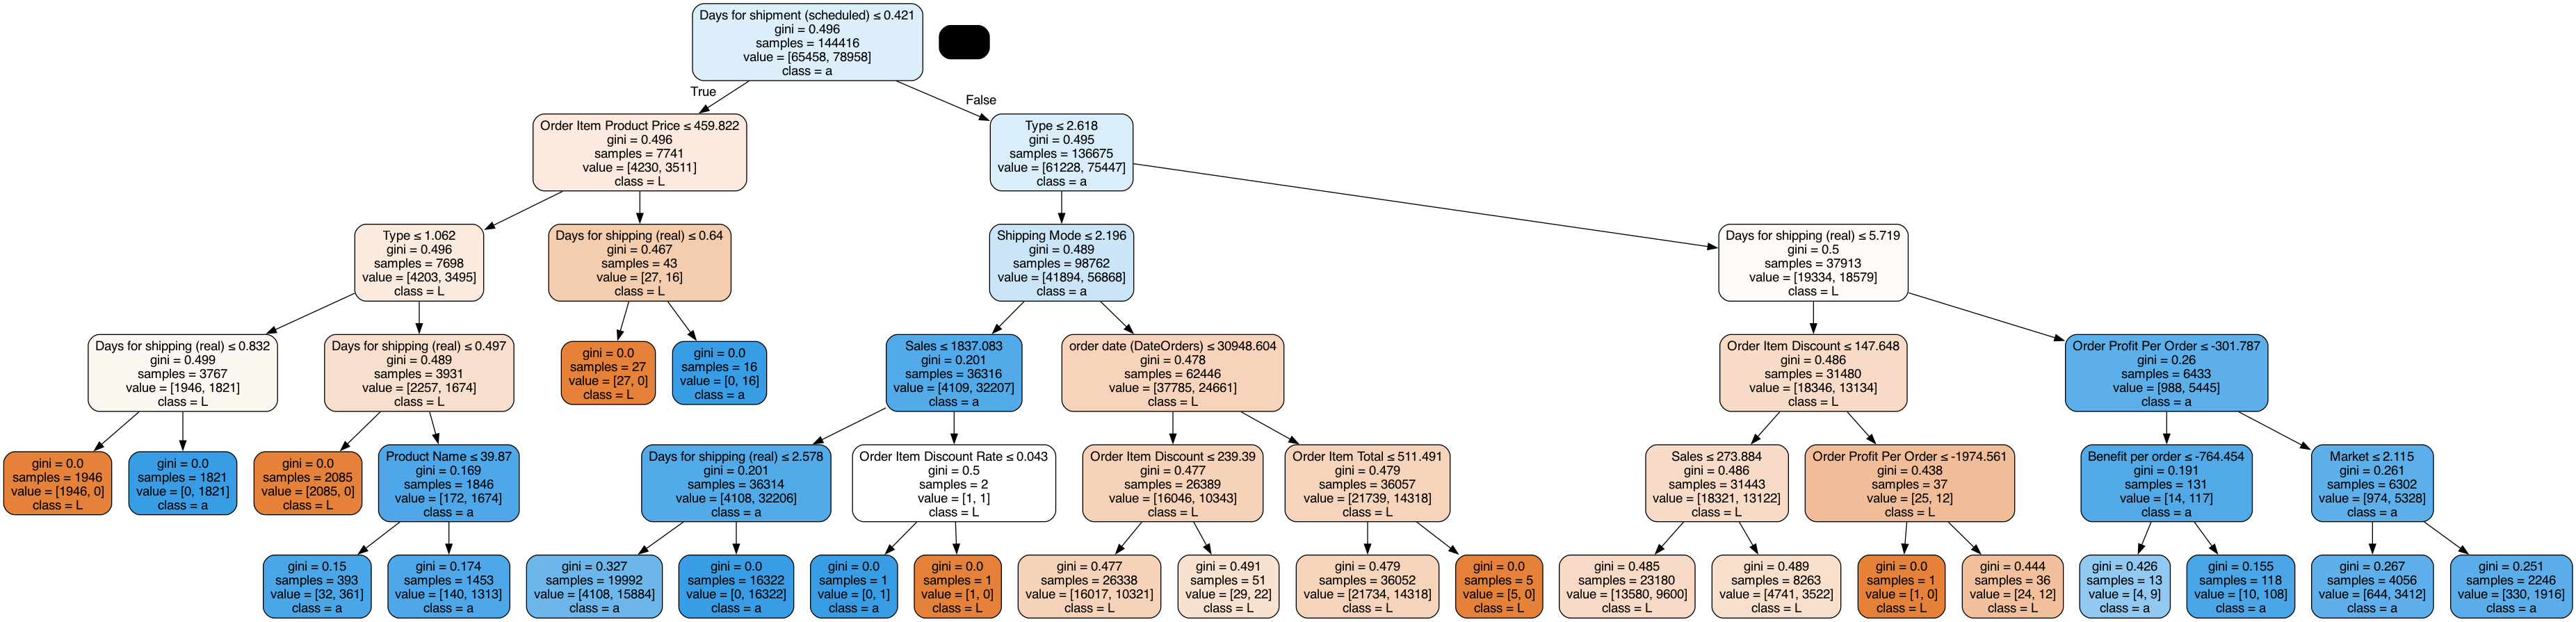

In [44]:
from sklearn.tree import export_graphviz
import pydotplus
# from sklearn.externals.six import StringIO  
from six import StringIO
from IPython.display import Image

dot_data = StringIO()
export_graphviz(
        tree_clf,
        out_file=dot_data,
        feature_names= X.columns.values.tolist(),
        class_names= "Late_delivery_risk",
        rounded=True,
        filled=True,
        special_characters=True
    )
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('decision_tree_model_1.png')
Image(graph.create_png())



In [45]:
# The decision tree model has been trained. We can now test it using the same train-set data.

predictions = tree_clf.predict(X)
predictions

array([0, 0, 0, ..., 0, 0, 0])

In [46]:
# Using mean sequared error to calculate the error percentage
from sklearn.metrics import mean_squared_error
tree_mean_sq_error = mean_squared_error(y, predictions)
tree_root_mean_sq_err = np.sqrt(tree_mean_sq_error)
tree_root_mean_sq_err

0.5460651806110116

Looks like the model is not able to predict the values well.
The % of error is 54.6%, which means the train accuracy is 46.4%.

In [47]:
# Training the a second model on different parameters

tree_clf = DecisionTreeClassifier(max_depth=10, max_features="log2", random_state=5, splitter="random", criterion="gini")
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=10, max_features='log2', random_state=5,
                       splitter='random')

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.658726 to fit

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.658726 to fit



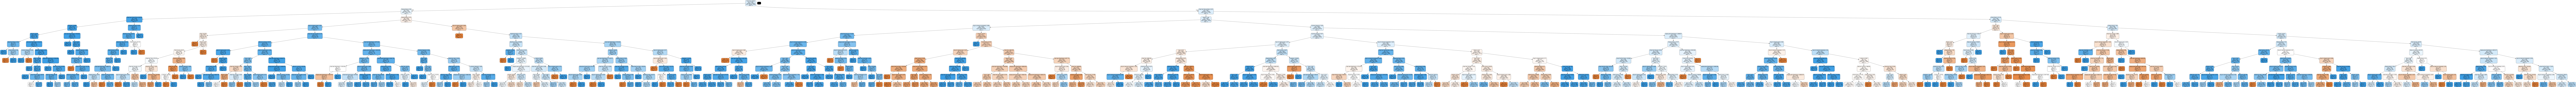

In [48]:
from sklearn.tree import export_graphviz
import pydotplus
# from sklearn.externals.six import StringIO  
from six import StringIO
from IPython.display import Image

dot_data = StringIO()
export_graphviz(
        tree_clf,
        out_file=dot_data,
        feature_names= X.columns.values.tolist(),
        class_names= "Late_delivery_risk",
        rounded=True,
        filled=True,
        special_characters=True
    )
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('decision_tree_model_2.png')
Image(graph.create_png())



In [49]:
predictions = tree_clf.predict(X)
predictions

array([0, 0, 0, ..., 0, 1, 0])

In [50]:
tree_mean_sq_error = mean_squared_error(y, predictions)
tree_root_mean_sq_err = np.sqrt(tree_mean_sq_error)
tree_root_mean_sq_err

0.48176791227108456

This has helped us improve the model from 46% to 52%.

In [51]:
y_test = scm_testset['Late_delivery_risk']
X_test = scm_testset.drop(columns=['Late_delivery_risk'])
test_predictions = tree_clf.predict(X_test)
test_predictions

array([1, 1, 0, ..., 0, 1, 0])

In [52]:
tree_mean_sq_error = mean_squared_error(y_test, test_predictions)
tree_root_mean_sq_err = np.sqrt(tree_mean_sq_error)
tree_root_mean_sq_err

0.48137915965998845

We can see both train and test accuracy is around 52%.

------------------------------------------------------------------
<br>

## Mid Term Project finishes here.

## Final Project begins here.
<br> 

-----------------------------------------------------------------

## Revisiting The Data

There are some columns which can benefit from One Hot Encoding rather than Label Encoding: These columns are as follows:

In [53]:
scm_updated = scm_df

In [54]:
scm_updated['Type'].value_counts()

Type
DEBIT       69295
TRANSFER    49883
PAYMENT     41725
CASH        19616
Name: count, dtype: int64

In [55]:
scm_updated['Delivery Status'].value_counts()

Delivery Status
Late delivery        98977
Advance shipping     41592
Shipping on time     32196
Shipping canceled     7754
Name: count, dtype: int64

As metioned before this is a redundant column, therefore we can drop it.

In [56]:
scm_updated = scm_updated.drop(columns=['Delivery Status'])

In [57]:
scm_updated['Customer Segment'].value_counts()

Customer Segment
Consumer       93504
Corporate      54789
Home Office    32226
Name: count, dtype: int64

In [58]:
scm_updated['Department Name'].value_counts()

Department Name
Fan Shop              66861
Apparel               48998
Golf                  33220
Footwear              14525
Outdoors               9686
Fitness                2479
Discs Shop             2026
Technology             1465
Pet Shop                492
Book Shop               405
Health and Beauty       362
Name: count, dtype: int64

In [59]:
scm_updated['Market'].value_counts()

Market
LATAM           51594
Europe          50252
Pacific Asia    41260
USCA            25799
Africa          11614
Name: count, dtype: int64

In [60]:
scm_updated['Product Name'].value_counts()

Product Name
Perfect Fitness Perfect Rip Deck                 24515
Nike Men's CJ Elite 2 TD Football Cleat          22246
Nike Men's Dri-FIT Victory Golf Polo             21035
O'Brien Men's Neoprene Life Vest                 19298
Field & Stream Sportsman 16 Gun Fire Safe        17325
                                                 ...  
Stiga Master Series ST3100 Competition Indoor       27
SOLE E35 Elliptical                                 15
Bushnell Pro X7 Jolt Slope Rangefinder              11
Bowflex SelectTech 1090 Dumbbells                   10
SOLE E25 Elliptical                                 10
Name: count, Length: 118, dtype: int64

In [61]:
scm_updated['Shipping Mode'].value_counts()

Shipping Mode
Standard Class    107752
Second Class       35216
First Class        27814
Same Day            9737
Name: count, dtype: int64

## One Hot Encoding
We can use One Hot Encoding for the following columns:
1.	Type
2.	Delivery Status
3.	Customer Segment
4.	Market
5.	Shipping Mode

In [62]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

label_encoder_type = LabelEncoder()
one_hot_encoder = OneHotEncoder(sparse=False)

In [63]:
# First performing encoding on 'Type' column
# before converting to One Hot Encoding, we are using Label Encoding
type_integer_encoded = label_encoder_type.fit_transform(scm_updated['Type'])
# initially the shape of type_integer_encoded is (180519,)
# therefore, we need to reshape it to (180519,1)
type_integer_encoded = type_integer_encoded.reshape(len(type_integer_encoded), 1)
type_integer_encoded

array([[1],
       [3],
       [0],
       ...,
       [3],
       [2],
       [2]])

In [64]:
# Let us see these categories of the Label Encoding
label_encoder_type.classes_

array(['CASH', 'DEBIT', 'PAYMENT', 'TRANSFER'], dtype=object)

From the above we can see that the label encoding has converted the text to numbers in the following way: <br>
0: CASH <br>
1: DEBIT <br>
2: PAYMENT <br>
3: TRANSFER <br>

In [65]:
# Now converting the Label Encoded values into One Hot Encoding
type_one_hot = one_hot_encoder.fit_transform(type_integer_encoded)
print(type_one_hot)
print() # printing new line char
print(type_one_hot.shape)

[[0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 ...
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]]

(180519, 4)


Each of the columns represent the respective Label Encoder. Therefore: 
- Column 0 represents CASH
- Column 1 represents DEBIT
- Column 2 represents PAYMENT
- Column 3 represents TRANSFER

## Issue with One Hot Encoding: Multi-Collinearity
Many times when doing One Hot Encoding, the issue of Dummy Variable trap comes to the picture - which further leads to the problem of multi-collinearity. <br><br>
For the 'Type' column above (and others), we will check for multi-collinearity using the Variance Inflation Factor (VIF) score.

In [66]:
# importing a library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [67]:
# defining a function which calculates VIF for all the columns
def calculate_vif(X):
    vif = pd.DataFrame()
    vif["Columns"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return(vif)

In [68]:
# first converting the one hot encoded value to pandas df object
calculate_vif(pd.DataFrame(type_one_hot))

Columns  VIF
0        0  1.0
1        1  1.0
2        2  1.0
3        3  1.0

We can see that all the four columns have VIF Value = 1. This means that all these columns can be added to the pandas data frame.

In [69]:
scm_updated[['Cash Type', 'Debit Type', 'Payment Type', 'Transfer Type']] = type_one_hot

In [70]:
# Verifying that the column names in the one hot encoding is correct
scm_updated.head(10)

Type  Days for shipping (real)  Days for shipment (scheduled)  \
0     DEBIT                         3                              4   
1  TRANSFER                         5                              4   
2      CASH                         4                              4   
3     DEBIT                         3                              4   
4   PAYMENT                         2                              4   
5  TRANSFER                         6                              4   
6     DEBIT                         2                              1   
7  TRANSFER                         2                              1   
8      CASH                         3                              2   
9      CASH                         2                              1   

   Benefit per order  Sales per customer  Late_delivery_risk  Category Id  \
0          91.250000          314.640015                   0           73   
1        -249.089996          311.359985                   1           73   
2        -247.779999          309.720001                   0           73   
3          22.860001          304.809998                   0           73   
4         134.210007          298.250000                   0           73   
5          18.580000          294.980011                   0           73   
6          95.180000          288.420013                   1           73   
7          68.430000          285.140015                   1           73   
8         133.720001          278.589996                   1           73   
9         132.149994          275.309998                   1           73   

    Category Name Customer City Customer Country  ...  \
0  Sporting Goods        Caguas      Puerto Rico  ...   
1  Sporting Goods        Caguas      Puerto Rico  ...   
2  Sporting Goods      San Jose          EE. UU.  ...   
3  Sporting Goods   Los Angeles          EE. UU.  ...   
4  Sporting Goods        Caguas      Puerto Rico  ...   
5  Sporting Goods     Tonawanda          EE. UU.  ...   
6  Sporting Goods        Caguas      Puerto Rico  ...   
7  Sporting Goods         Miami          EE. UU.  ...   
8  Sporting Goods        Caguas      Puerto Rico  ...   
9  Sporting Goods     San Ramon          EE. UU.  ...   

                                  Product Image  Product Name  Product Price  \
0  http://images.acmesports.sports/Smart+watch   Smart watch          327.75   
1  http://images.acmesports.sports/Smart+watch   Smart watch          327.75   
2  http://images.acmesports.sports/Smart+watch   Smart watch          327.75   
3  http://images.acmesports.sports/Smart+watch   Smart watch          327.75   
4  http://images.acmesports.sports/Smart+watch   Smart watch          327.75   
5  http://images.acmesports.sports/Smart+watch   Smart watch          327.75   
6  http://images.acmesports.sports/Smart+watch   Smart watch          327.75   
7  http://images.acmesports.sports/Smart+watch   Smart watch          327.75   
8  http://images.acmesports.sports/Smart+watch   Smart watch          327.75   
9  http://images.acmesports.sports/Smart+watch   Smart watch          327.75   

  Product Status shipping date (DateOrders)   Shipping Mode Cash Type  \
0              0             2/3/2018 22:56  Standard Class       0.0   
1              0            1/18/2018 12:27  Standard Class       0.0   
2              0            1/17/2018 12:06  Standard Class       1.0   
3              0            1/16/2018 11:45  Standard Class       0.0   
4              0            1/15/2018 11:24  Standard Class       0.0   
5              0            1/19/2018 11:03  Standard Class       0.0   
6              0            1/15/2018 10:42     First Class       0.0   
7              0            1/15/2018 10:21     First Class       0.0   
8              0            1/16/2018 10:00    Second Class       1.0   
9              0             1/15/2018 9:39     First Class       1.0   

  Debit Type  Payment Type  Transfer Type  
0        

In [71]:
# And finally, we can now drop the Type column.
scm_updated = scm_updated.drop(columns=['Type'])

Similar to the above process, we will do the One Hot Encoding for the other columns as well.

In [72]:
label_encoder_cust_seg = LabelEncoder()
label_encoder_market = LabelEncoder()
label_encoder_ship_mode = LabelEncoder()

In [73]:
# label encoder & one hot encoder for - customer segment
cust_seg_integer_encoded = label_encoder_cust_seg.fit_transform(scm_updated['Customer Segment'])
cust_seg_integer_encoded = cust_seg_integer_encoded.reshape(len(cust_seg_integer_encoded), 1)
cust_seg_one_hot = one_hot_encoder.fit_transform(cust_seg_integer_encoded)

# label encoder & one hot encoder for - market
market_integer_encoded = label_encoder_market.fit_transform(scm_updated['Market'])
market_integer_encoded = market_integer_encoded.reshape(len(market_integer_encoded), 1)
market_one_hot = one_hot_encoder.fit_transform(market_integer_encoded)

# label encoder & one hot encoder for - shipping mode
ship_mode_integer_encoded = label_encoder_ship_mode.fit_transform(scm_updated['Shipping Mode'])
ship_mode_integer_encoded = ship_mode_integer_encoded.reshape(len(ship_mode_integer_encoded), 1)
ship_mode_one_hot = one_hot_encoder.fit_transform(ship_mode_integer_encoded)

In [74]:
# now checking the vif for each of the above

print('VIF for Customer Segment')
print(calculate_vif(pd.DataFrame(cust_seg_one_hot)))

print('VIF for Market')
print(calculate_vif(pd.DataFrame(market_one_hot)))

print('VIF for Shipping Mode')
print(calculate_vif(pd.DataFrame(ship_mode_one_hot)))

VIF for Customer Segment
   Columns  VIF
0        0  1.0
1        1  1.0
2        2  1.0
VIF for Market
   Columns  VIF
0        0  1.0
1        1  1.0
2        2  1.0
3        3  1.0
4        4  1.0
VIF for Shipping Mode
   Columns  VIF
0        0  1.0
1        1  1.0
2        2  1.0
3        3  1.0


Surprisingly the VIF values for all the other columns are also 1.0.
Therefore, we can add them all into the pandas data frame.

In [75]:
# Customer Segment Encoding
print(label_encoder_cust_seg.classes_)

['Consumer' 'Corporate' 'Home Office']


In [76]:
scm_updated[['Consumer Customer Segment', 'Corporate Customer Segment', 'Home Office Customer Segment']] = cust_seg_one_hot

In [77]:
scm_updated[['Customer Segment', 'Consumer Customer Segment', 'Corporate Customer Segment', 'Home Office Customer Segment']].head(10)

Customer Segment  Consumer Customer Segment  Corporate Customer Segment  \
0         Consumer                        1.0                         0.0   
1         Consumer                        1.0                         0.0   
2         Consumer                        1.0                         0.0   
3      Home Office                        0.0                         0.0   
4        Corporate                        0.0                         1.0   
5         Consumer                        1.0                         0.0   
6      Home Office                        0.0                         0.0   
7        Corporate                        0.0                         1.0   
8        Corporate                        0.0                         1.0   
9        Corporate                        0.0                         1.0   

   Home Office Customer Segment  
0                           0.0  
1                           0.0  
2                           0.0  
3                           1.0  
4                           0.0  
5                           0.0  
6                           1.0  
7                           0.0  
8                           0.0  
9                           0.0

In [78]:
scm_updated = scm_updated.drop(columns=['Customer Segment'])

In [79]:
# Market Encoding
print(label_encoder_market.classes_)

['Africa' 'Europe' 'LATAM' 'Pacific Asia' 'USCA']


In [80]:
scm_updated[['Africa Market', 'Europe Market', 'LATAM Market', 'Pacific Asia Market', 'USCA Market']] = market_one_hot

In [81]:
scm_updated = scm_updated.drop(columns=['Market'])

In [82]:
# Shipping Mode Encoding
print(label_encoder_ship_mode.classes_)

['First Class' 'Same Day' 'Second Class' 'Standard Class']


In [83]:
scm_updated[['First Class Shipping Mode','Same Day Shipping Mode','Second Class Shipping Mode','Standard Class Shipping Mode']] = ship_mode_one_hot

In [84]:
scm_updated = scm_updated.drop(columns=['Shipping Mode'])

In [85]:
# Let's see how the data frame looks like now
scm_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 64 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Days for shipping (real)       180519 non-null  int64  
 1   Days for shipment (scheduled)  180519 non-null  int64  
 2   Benefit per order              180519 non-null  float64
 3   Sales per customer             180519 non-null  float64
 4   Late_delivery_risk             180519 non-null  int64  
 5   Category Id                    180519 non-null  int64  
 6   Category Name                  180519 non-null  object 
 7   Customer City                  180519 non-null  object 
 8   Customer Country               180519 non-null  object 
 9   Customer Email                 180519 non-null  object 
 10  Customer Fname                 180519 non-null  object 
 11  Customer Id                    180519 non-null  int64  
 12  Customer Lname                

## Binary Encoding
Let us consider the other columns:
- Category Name
- Department Name
- Product Name

For the columns listed above, there are too many categories of data. This makes it unreasonable to use One Hot Encoding as the model will become highly complex. Furthermore, the values in this column do not have any inherent order. This means that Label Encoders will also not be a good idea. For this project I have decided to explore the use of Binary Encoders as a solution to encode the above columns.

In [94]:
# Let us explore the other columns
print(scm_updated[['Category Name']].nunique())
print()
print(scm_updated[['Department Name']].nunique())
print()
print(scm_updated[['Product Name']].nunique())

Category Name    50
dtype: int64

Department Name    11
dtype: int64

Product Name    118
dtype: int64


We can see that there are a total of 50 unique category names, 11 unique department names, and 118 unique product names in this dataset.

In [95]:
# importing category_encoders
import category_encoders as ce

In [96]:
binary_encoder_cat_name = ce.BinaryEncoder(cols=['Category Name'], return_df=True)
cat_name_binary_encoded_data = binary_encoder_cat_name.fit_transform(scm_updated['Category Name'])
cat_name_binary_encoded_data

Category Name_0  Category Name_1  Category Name_2  Category Name_3  \
0                     0                0                0                0   
1                     0                0                0                0   
2                     0                0                0                0   
3                     0                0                0                0   
4                     0                0                0                0   
...                 ...              ...              ...              ...   
180514                1                0                0                0   
180515                1                0                0                0   
180516                1                0                0                0   
180517                1                0                0                0   
180518                1                0                0                0   

        Category Name_4  Category Name_5  
0                     0                1  
1                     0                1  
2                     0                1  
3                     0                1  
4                     0                1  
...                 ...              ...  
180514                0                0  
180515                0                0  
180516                0                0  
180517                0                0  
180518                0                0  

[180519 rows x 6 columns]

Converting 50 (decimal) to binary will result in 110010. This requires 6 columns (since there are 6 bits) to represnt all the data. <br>
Practically, from the above we can see that the binary encoding has created 6 columns - column 0 to column 5.

In [100]:
scm_updated[['Category Name 0', 'Category Name 1', 'Category Name 2', 'Category Name 3', 'Category Name 4', 'Category Name 5']] = cat_name_binary_encoded_data
scm_updated[['Category Name','Category Name 0', 'Category Name 1', 'Category Name 2', 'Category Name 3', 'Category Name 4', 'Category Name 5']].head(-10)

Category Name  Category Name 0  Category Name 1  Category Name 2  \
0       Sporting Goods                0                0                0   
1       Sporting Goods                0                0                0   
2       Sporting Goods                0                0                0   
3       Sporting Goods                0                0                0   
4       Sporting Goods                0                0                0   
...                ...              ...              ...              ...   
180504         Fishing                1                0                0   
180505         Fishing                1                0                0   
180506         Fishing                1                0                0   
180507         Fishing                1                0                0   
180508         Fishing                1                0                0   

        Category Name 3  Category Name 4  Category Name 5  
0                     0                0                1  
1                     0                0                1  
2                     0                0                1  
3                     0                0                1  
4                     0                0                1  
...                 ...              ...              ...  
180504                0                0                0  
180505                0                0                0  
180506                0                0                0  
180507                0                0                0  
180508                0                0                0  

[180509 rows x 7 columns]

We can see that 'Sporting Goods' category is encoded as '000001' and 'Fishing' is encoded as '100000'.

In [101]:
scm_updated.drop(columns=['Category Name'], inplace=True)
scm_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 69 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Days for shipping (real)       180519 non-null  int64  
 1   Days for shipment (scheduled)  180519 non-null  int64  
 2   Benefit per order              180519 non-null  float64
 3   Sales per customer             180519 non-null  float64
 4   Late_delivery_risk             180519 non-null  int64  
 5   Category Id                    180519 non-null  int64  
 6   Customer City                  180519 non-null  object 
 7   Customer Country               180519 non-null  object 
 8   Customer Email                 180519 non-null  object 
 9   Customer Fname                 180519 non-null  object 
 10  Customer Id                    180519 non-null  int64  
 11  Customer Lname                 180511 non-null  object 
 12  Customer Password             

In [105]:
# similarly, let us use binary encoding for the other two columns as well

binary_encoder_dept_name = ce.BinaryEncoder(cols=['Department Name'], return_df=True)
dept_name_binary_encoded_data = binary_encoder_dept_name.fit_transform(scm_updated['Department Name'])
# Department has 10 categories = 1010 in binary. Therefore we need 4 columns:
scm_updated[['Department Name 0', 'Department Name 1', 'Department Name 2', 'Department Name 3']] = dept_name_binary_encoded_data

binary_encoder_prod_name = ce.BinaryEncoder(cols=['Product Name'], return_df=True)
prod_name_binary_encoded_data = binary_encoder_prod_name.fit_transform(scm_updated['Product Name'])
# Product Name has 118 categories = 1110110 in binary. Therefore we need 7 columns:
scm_updated[['Product Name 0', 'Product Name 1', 'Product Name 2', 'Product Name 3', 'Product Name 4', 'Product Name 5', 'Product Name 6']] = prod_name_binary_encoded_data


In [107]:
scm_updated.drop(columns=['Department Name', 'Product Name'], inplace=True)

In [108]:
scm_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 78 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Days for shipping (real)       180519 non-null  int64  
 1   Days for shipment (scheduled)  180519 non-null  int64  
 2   Benefit per order              180519 non-null  float64
 3   Sales per customer             180519 non-null  float64
 4   Late_delivery_risk             180519 non-null  int64  
 5   Category Id                    180519 non-null  int64  
 6   Customer City                  180519 non-null  object 
 7   Customer Country               180519 non-null  object 
 8   Customer Email                 180519 non-null  object 
 9   Customer Fname                 180519 non-null  object 
 10  Customer Id                    180519 non-null  int64  
 11  Customer Lname                 180511 non-null  object 
 12  Customer Password             

### Feature Engineering
#### Latitude & Longitude for Customer Locations
In the mid-term project, I visualized the stores on the world map. This was possible becaues the stores data had numerical values for the latitude and the longitude. <br><br>
However, there are no latitude and longitude values for the customer locations. Therefore in this section I will try to convert the values from text to latitude & longitude.

In [112]:
# len(scm_clean_df['Latitude'].unique())

In [113]:
# len(scm_clean_df['Longitude'].unique())

In [114]:
# len(scm_clean_df['Order City'].unique())

In [115]:
# len(scm_clean_df['Order Country'].unique())

In [97]:
# from geopy.geocoders import Nominatim

# scm_clean_df[['Order Country', 'Order City']].drop_duplicates(inplace=True)
# scm_clean_df[['Order Country', 'Order City']].dropna(inplace=True)
# scm_clean_df[['Order Country', 'Order City']].reset_index(inplace=True, drop=True)

# geolocator = Nominatim(user_agent="city_location") #city and country
# geolocator_country = Nominatim(user_agent="YourAppNameForCountryGeocoding/1.0") #only country when city does not work

/var/folders/3m/tt_kbz7d2tx3f5cx3v4nd4940000gn/T/ipykernel_11768/1894401055.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/3m/tt_kbz7d2tx3f5cx3v4nd4940000gn/T/ipykernel_11768/1894401055.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [76]:
# df_delivery_location_lat_n_long.loc[:,'Delivery Latitude'] = None
# df_delivery_location_lat_n_long.loc[:,'Delivery Longitude'] = None

# for index,row in df_delivery_location_lat_n_long.iterrows():
#     city = row['Order City']
#     country = row['Order Country']
    
#     if index%500 == 0:
#         print(index)
    
#     try:
#         location = geolocator.geocode(f"{city}, {country}")

#         df_delivery_location_lat_n_long.loc[index,'Delivery Latitude'] = location.latitude
#         df_delivery_location_lat_n_long.loc[index,'Delivery Longitude']= location.longitude
    
#     except AttributeError:
        
#         location = geolocator_country.geocode(country)
        
#         df_delivery_location_lat_n_long.loc[index,'Delivery Latitude'] = location.latitude
#         df_delivery_location_lat_n_long.loc[index,'Delivery Longitude']= location.longitude

0
500
1000
1500
2000


GeocoderUnavailable: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /search?q=Duque+de+Caxias%2C+Brasil&format=json&limit=1 (Caused by ReadTimeoutError("HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Read timed out. (read timeout=1)"))

In [118]:
scm_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 27 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Late_delivery_risk             180519 non-null  int64  
 6   Category Name                  180519 non-null  object 
 7   Customer Segment               180519 non-null  object 
 8   Department Name                180519 non-null  object 
 9   Latitude                       180519 non-null  float64
 10  Longitude                      180519 non-null  float64
 11  Market                         180519 non-null  object 
 12  Order City                    